## LAND PRICE PAID DATA ANALYSIS  


##### `Introduction :`
Price Paid Data tracks property sales in England and Wales submitted to HM Land Registry for registration. Price Paid Data is based on the raw data released each month.

The amount of time between the England and Wales that are sold for sale of a property and the registration of this information with HM Land Registry varies. It typically ranges between 2 weeks and 2 months. Data for the two most recent months is therefore incomplete and does not give an indication of final monthly volumes. Occasionally the interval between sale and registration is longer than two months. The small number of sales affected cannot be updated for publication until the sales are lodged for registration.

##### `Data Description`

1. __LRUniqueID:__ A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.
2. __SalePrice:__ Sale price stated on the transfer deed
3. __SaleDate:__ Date when the sale was completed, as stated on the transfer deed.
4. __PCUnit:__ This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.
5. __PropertyType:__ D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other,we only record the above categories to describe property type, we do not separately identify bungalows, end-of-terrace properties are included in the Terraced category above, ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values, for example where a property comprises more than one large parcel of land.
6. __NewBuild:__ 	Indicates the age of the property and applies to all price paid transactions, residential and non-residential.Y = a newly built property, N = an established residential building
7. __Freehold:__ Relates to the tenure: F = Freehold, L= Leasehold etc.Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.
8. __Add1:__ Primary Addressable Object Name. Typically the house number or name.
9. __Add2:__ Secondary Addressable Object Name. Where a property has been divided into separate units (for example, flats), the PAON (above) will identify the building and a SAON will be specified that identifies the separate unit/flat.
10. __Add3:__ Name of the Street
11. __Add4:__ Name of the Locality
12. __Add5:__ Name of the Town/City
13. __Add6:__ Name of the District
14. __Add7:__ Name of the County
15. __Easting:__ 
16. __Northing:__ 
17. __Longitude:__
18. __Latitude:__

In [1]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


#### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from datetime import datetime
import geopy.distance


#### Importing  Data

In [3]:
# Display the first few rows of the DataFrame
df = pd.read_csv('Land Registry Price Paid Data.csv')
df.head()

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,Add1,Add2,Add3,Add4,Add5,Add6,Add7,oslaua,lsoa11,oa11,Easting,Northing,Longitude,Latitude
0,{E0E65E87-B106-4411-961F-05AD44B2466F},110000,10/1/2010,B19 2AT,T,N,F,26,NaN,LOZELLS STREET,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033628,E00045244,406439,289262,-1.906575,52.501223
1,{E086C0A5-F4E8-4511-A1D3-1CFC70324463},80000,3/31/2011,B36 8QN,T,N,F,9,NaN,AYRSHIRE CLOSE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009079,E00046081,412719,289832,-1.814042,52.506238
2,{3B2CA952-17C1-40DF-B6CB-31710FCA2ACA},250000,12/6/2013,B28 9PA,S,Y,F,NaN,11,THE LOXLEYS,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01032589,E00045887,411333,280447,-1.834778,52.421898
3,{5BD504F3-4450-4463-94ED-F6753446F1F4},127500,9/6/2013,B32 1PT,T,N,F,98A,NaN,RIDGACRE LANE,QUINTON,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009249,E00046936,400284,284566,-1.997248,52.459043
4,{070F2F07-A6A0-4546-9A9A-1E91518B4F1D},118000,9/11/2012,B73 6DS,F,N,L,TRENT COURT,FLAT 12,GARRARD GARDENS,NaN,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009449,E00047879,411779,296094,-1.827671,52.562553


**Let us now see the number of variables and observations in the data.**

In [4]:
# Display the number of rows and columns in the Dataframe
df.shape

(119446, 21)

**Interpretation:** The data has 119446 observations and 21 variables.

**Get a concise summary of the DataFrame.**

In [5]:
# Display information about the dataframe, datatype and non null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119446 entries, 0 to 119445
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LRUniqueID    119446 non-null  object 
 1   SalePrice     119446 non-null  int64  
 2   SaleDate      119446 non-null  object 
 3   PCUnit        119446 non-null  object 
 4   PropertyType  119446 non-null  object 
 5   NewBuild      119446 non-null  object 
 6   Freehold      119446 non-null  object 
 7   Add1          116179 non-null  object 
 8   Add2          21693 non-null   object 
 9   Add3          119446 non-null  object 
 10  Add4          36454 non-null   object 
 11  Add5          119446 non-null  object 
 12  Add6          119446 non-null  object 
 13  Add7          119446 non-null  object 
 14  oslaua        119446 non-null  object 
 15  lsoa11        119446 non-null  object 
 16  oa11          119446 non-null  object 
 17  Easting       119446 non-null  int64  
 18  Nort

**Interpretation:**  5 variables are numeric and 16 variables are categorical. 

In [6]:
# Generate descriptive statistics of numerical columns in the DataFrame
df.describe()

,SalePrice,Easting,Northing,Longitude,Latitude
count,1.194460e+05,119446.000000,119446.000000,119446.000000,119446.000000
mean,1.780880e+05,408038.468706,286740.555339,-1.883036,52.478519
std,1.202095e+05,4236.971771,5816.042181,0.062437,0.052258
min,2.500000e+03,397872.000000,276267.000000,-2.032704,52.384434
25%,1.120000e+05,404878.000000,282138.000000,-1.929607,52.437170
50%,1.479500e+05,407981.000000,286083.000000,-1.883966,52.472556
75%,2.066582e+05,411531.000000,291604.000000,-1.831517,52.522197
max,4.725000e+06,416733.000000,300912.000000,-1.754730,52.605885


In [7]:
# Exploring Missing Values
df.isnull().sum()

LRUniqueID          0
SalePrice           0
SaleDate            0
PCUnit              0
PropertyType        0
NewBuild            0
Freehold            0
Add1             3267
Add2            97753
Add3                0
Add4            82992
Add5                0
Add6                0
Add7                0
oslaua              0
lsoa11              0
oa11                0
Easting             0
Northing            0
Longitude           0
Latitude            0
dtype: int64

#### Data Cleaning

In [8]:
# changing the columns name as follows
df1 = df.rename(columns = {"Add1" : "PAON", "Add2":"SOAN", "Add3":"Street", "Add4":"Locality", "Add5":"City", "Add6":"District", "Add7":"County"})
df1.head()

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,PAON,SOAN,Street,Locality,City,District,County,oslaua,lsoa11,oa11,Easting,Northing,Longitude,Latitude
0,{E0E65E87-B106-4411-961F-05AD44B2466F},110000,10/1/2010,B19 2AT,T,N,F,26,NaN,LOZELLS STREET,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033628,E00045244,406439,289262,-1.906575,52.501223
1,{E086C0A5-F4E8-4511-A1D3-1CFC70324463},80000,3/31/2011,B36 8QN,T,N,F,9,NaN,AYRSHIRE CLOSE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009079,E00046081,412719,289832,-1.814042,52.506238
2,{3B2CA952-17C1-40DF-B6CB-31710FCA2ACA},250000,12/6/2013,B28 9PA,S,Y,F,NaN,11,THE LOXLEYS,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01032589,E00045887,411333,280447,-1.834778,52.421898
3,{5BD504F3-4450-4463-94ED-F6753446F1F4},127500,9/6/2013,B32 1PT,T,N,F,98A,NaN,RIDGACRE LANE,QUINTON,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009249,E00046936,400284,284566,-1.997248,52.459043
4,{070F2F07-A6A0-4546-9A9A-1E91518B4F1D},118000,9/11/2012,B73 6DS,F,N,L,TRENT COURT,FLAT 12,GARRARD GARDENS,NaN,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009449,E00047879,411779,296094,-1.827671,52.562553


In [9]:
# Renaming the property type to make it user friendly 
df1['PropertyType']= df1['PropertyType'].replace("T","Terraced").replace("D","Detached").replace("S", "Semi-Detached").replace("F", "Flats/Mainsonetts")

In [10]:
# To check the value count category wise
df1['PropertyType'].value_counts()

Terraced             43441
Semi-Detached        38422
Flats/Mainsonetts    24320
Detached             13263
Name: PropertyType, dtype: int64

In [11]:
# Renaming 'N' as 'Established Residential' and 'Y' as 'New Built'
df1['NewBuild']  = df1['NewBuild'].replace("N", "Established Residential").replace("Y", "New Built")

In [12]:
# To check if it is changed or not 
df1['NewBuild'].value_counts()

Established Residential    109260
New Built                   10186
Name: NewBuild, dtype: int64

In [13]:
# Renaming 'F' as 'Freehold' and 'L' as 'Leasehold' in the dataframe 
df1['Freehold'] = df1['Freehold'].replace("F", "Freehold").replace("L", "Leasehold")

In [14]:
# To check if its changed or not
df1['Freehold'].value_counts()

Freehold     86457
Leasehold    32989
Name: Freehold, dtype: int64

In [15]:
# To check the unique values in 'Street' column
df1["Street"].nunique()

6800

In [16]:
# To check the unique values present in 'Locality' column
df1['Locality'].nunique()

86

In [17]:
df1['County'].value_counts()

WEST MIDLANDS            119413
WORCESTERSHIRE               23
STAFFORDSHIRE                 7
GREATER LONDON                1
SOUTH GLOUCESTERSHIRE         1
WARWICKSHIRE                  1
Name: County, dtype: int64

In [18]:
# To check the values present in the 'District' column.
df1['District'].value_counts()

BIRMINGHAM               119387
BROMSGROVE                   22
SOLIHULL                     10
COVENTRY                      7
LICHFIELD                     7
SANDWELL                      4
DUDLEY                        3
REDDITCH                      1
SUTTON                        1
WALSALL                       1
SOUTH GLOUCESTERSHIRE         1
WARWICK                       1
WOLVERHAMPTON                 1
Name: District, dtype: int64

In [19]:
# To check the values present in the 'Country' column.
df1['County'].value_counts()

WEST MIDLANDS            119413
WORCESTERSHIRE               23
STAFFORDSHIRE                 7
GREATER LONDON                1
SOUTH GLOUCESTERSHIRE         1
WARWICKSHIRE                  1
Name: County, dtype: int64

In [20]:
# To Check duplicate values present in the dataframe.
df1.duplicated().sum()

0

In [21]:
# To show first few rows of the dataframe.
df1.head()

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,PAON,SOAN,Street,Locality,City,District,County,oslaua,lsoa11,oa11,Easting,Northing,Longitude,Latitude
0,{E0E65E87-B106-4411-961F-05AD44B2466F},110000,10/1/2010,B19 2AT,Terraced,Established Residential,Freehold,26,NaN,LOZELLS STREET,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033628,E00045244,406439,289262,-1.906575,52.501223
1,{E086C0A5-F4E8-4511-A1D3-1CFC70324463},80000,3/31/2011,B36 8QN,Terraced,Established Residential,Freehold,9,NaN,AYRSHIRE CLOSE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009079,E00046081,412719,289832,-1.814042,52.506238
2,{3B2CA952-17C1-40DF-B6CB-31710FCA2ACA},250000,12/6/2013,B28 9PA,Semi-Detached,New Built,Freehold,NaN,11,THE LOXLEYS,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01032589,E00045887,411333,280447,-1.834778,52.421898
3,{5BD504F3-4450-4463-94ED-F6753446F1F4},127500,9/6/2013,B32 1PT,Terraced,Established Residential,Freehold,98A,NaN,RIDGACRE LANE,QUINTON,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009249,E00046936,400284,284566,-1.997248,52.459043
4,{070F2F07-A6A0-4546-9A9A-1E91518B4F1D},118000,9/11/2012,B73 6DS,Flats/Mainsonetts,Established Residential,Leasehold,TRENT COURT,FLAT 12,GARRARD GARDENS,NaN,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009449,E00047879,411779,296094,-1.827671,52.562553


In [22]:
# We are replacing '/' with '-' so we can convert it into datetime format.
df1['SaleDate'] = df1['SaleDate'].str.replace('/', '-')

In [23]:
#Convert current date column into datetime object for easy time based manipulation
df1['SaleDate'] = df1.apply(lambda x: datetime.strptime(x['SaleDate'], '%m-%d-%Y'), axis=1)

In [24]:
df1['SaleYear'] = df1.apply(lambda x: x['SaleDate'].year, axis=1)
df1['SaleMonth'] = df1.apply(lambda x: x['SaleDate'].month, axis=1)
df1['SaleDay'] = df1.apply(lambda x: x['SaleDate'].day, axis=1)
df1['SaleYearMonth'] = df1['SaleYear'] + df1['SaleMonth']/12

In [25]:
df1.head()

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,PAON,SOAN,Street,Locality,City,District,County,oslaua,lsoa11,oa11,Easting,Northing,Longitude,Latitude,SaleYear,SaleMonth,SaleDay,SaleYearMonth
0,{E0E65E87-B106-4411-961F-05AD44B2466F},110000,2010-10-01,B19 2AT,Terraced,Established Residential,Freehold,26,NaN,LOZELLS STREET,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033628,E00045244,406439,289262,-1.906575,52.501223,2010,10,1,2010.833333
1,{E086C0A5-F4E8-4511-A1D3-1CFC70324463},80000,2011-03-31,B36 8QN,Terraced,Established Residential,Freehold,9,NaN,AYRSHIRE CLOSE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009079,E00046081,412719,289832,-1.814042,52.506238,2011,3,31,2011.250000
2,{3B2CA952-17C1-40DF-B6CB-31710FCA2ACA},250000,2013-12-06,B28 9PA,Semi-Detached,New Built,Freehold,NaN,11,THE LOXLEYS,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01032589,E00045887,411333,280447,-1.834778,52.421898,2013,12,6,2014.000000
3,{5BD504F3-4450-4463-94ED-F6753446F1F4},127500,2013-09-06,B32 1PT,Terraced,Established Residential,Freehold,98A,NaN,RIDGACRE LANE,QUINTON,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009249,E00046936,400284,284566,-1.997248,52.459043,2013,9,6,2013.750000
4,{070F2F07-A6A0-4546-9A9A-1E91518B4F1D},118000,2012-09-11,B73 6DS,Flats/Mainsonetts,Established Residential,Leasehold,TRENT COURT,FLAT 12,GARRARD GARDENS,NaN,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009449,E00047879,411779,296094,-1.827671,52.562553,2012,9,11,2012.750000


### HS2

##### WHAT IS HS2 ?
High Speed 2 (HS2) is a planned high-speed railway line and network of passenger train services in Great Britain. The new railway line, which is currently under construction in England, is to run between the West Midlands and London, with a spur to Birmingham. A network of train services will use the new line and existing conventional track to reach their destinations in the Midlands, North West England, and Scotland. HS2 is to be Britain's second purpose-built high-speed line after High Speed 1, which connects London to the Channel Tunnel. The majority of the project is planned to be completed between 2029 and 2033

Phase 1 is now the whole of the new HS2 track. It will be a high speed line between __Euston railway station__ in London and a junction with the __West Coast Main Line (WCML)__ outside Handsacre, a village to the north of Lichfield in __Staffordshire__, with a branch to a new station at __Birmingham Curzon Street__.[31] There will also be new stations at __Old Oak Common__, in northwest London, and __Birmingham Interchange__, near __Solihull__.[32] The section between Old Oak Common and the West Midlands is scheduled to open around 2030, with the link to Euston following between 2031 and 2035.[33] The phase 1 high speed track, including the branch to Birmingham, is 225 kilometres (140 mi) long.[34][35][1] It is flanked by the WCML and the __Chiltern Line__.

__For more details you can visit:__ https://en.wikipedia.org/wiki/High_Speed_2


- One of the first things I looked to analyse was whether the distance from the station had any bearing on the house price changes. The function below can calcuate the distance between a property and the HS2 station, we use this to add a new column to the data with this distance.

In [26]:
#https://en.wikipedia.org/wiki/Birmingham_Curzon_Street_railway_station
hs2_station_coords = (52.4756314308,  -1.88515312604)  

In [27]:
first_property_coords = (df1['Latitude'][0], df1['Longitude'][0])

hs2_property_distance = geopy.distance.geodesic(hs2_station_coords, first_property_coords).km

print('The distance between the first property in the dataset and HS2 is ' 
      + str(round(hs2_property_distance,1))
      +'km.')


The distance between the first property in the dataset and HS2 is 3.2km.


- One theory about how HS2 will increase house prices in Birmingham is that more people will be able live in Birmingham and commute into London. People who will be doing this will want to live close to the station so lets make flag for whether people are within reasonable walking distance to the HS2 station.

- The mean distance walked to a train station by people in the UK is ~1k [1]. Lets add a flag for a whether a property is within a reasonable walking distance of the station.

In [28]:
df1['Distance_from_HS2_km'] = df1.apply(lambda x: geopy.distance.geodesic(
                                                    hs2_station_coords, (x['Latitude'],x['Longitude'])).km, axis=1)

In [29]:
df1['Less_than_1k_away'] = df1.apply(lambda x: 1 if x['Distance_from_HS2_km'] < 1 else 0, axis=1)

- HS2 was proposed in 10th January 2012 
- Approved by parliment in 23rd Feburary 2017. 
Lets add flags for whether the property was sold after these dates.

<br> <br>[1]:https://www.gov.uk/government/news/britain-to-have-new-national-high-speed-rail-network <br>[2]:https://www.gov.uk/government/collections/high-speed-rail-london-west-midlands-bill

In [30]:
# here adding two columns 'Sale_after_hs2_proposal' and 'Sale_after_hs2_approval',were we will get the count of each
df1['Sale_after_hs2_proposal'] = df1.apply(lambda x: 1 if x['SaleDate'] >= 
                                                datetime.strptime('2012-01-10', '%Y-%m-%d') else 0, axis=1)

df1['Sale_after_hs2_approval'] = df1.apply(lambda x: 1 if x['SaleDate'] >= 
                                                datetime.strptime('2017-02-23', '%Y-%m-%d') else 0, axis=1)

In [31]:
df1.head(2)

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,PAON,SOAN,Street,Locality,City,District,County,oslaua,lsoa11,oa11,Easting,Northing,Longitude,Latitude,SaleYear,SaleMonth,SaleDay,SaleYearMonth,Distance_from_HS2_km,Less_than_1k_away,Sale_after_hs2_proposal,Sale_after_hs2_approval
0,{E0E65E87-B106-4411-961F-05AD44B2466F},110000,2010-10-01,B19 2AT,Terraced,Established Residential,Freehold,26,NaN,LOZELLS STREET,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033628,E00045244,406439,289262,-1.906575,52.501223,2010,10,1,2010.833333,3.197982,0,0,0
1,{E086C0A5-F4E8-4511-A1D3-1CFC70324463},80000,2011-03-31,B36 8QN,Terraced,Established Residential,Freehold,9,NaN,AYRSHIRE CLOSE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009079,E00046081,412719,289832,-1.814042,52.506238,2011,3,31,2011.250000,5.910157,0,0,0


### 1) Has the construction and development of HS2 led to any noticeable impact on property sales?

In [32]:
# This calculates the minimum value of the 'SaleDate' column.
print(min(df1['SaleDate']))
# This calculates the maximum value of the 'SaleDate' column.
print(max(df1['SaleDate']))

2009-01-02 00:00:00
2019-11-26 00:00:00


In [33]:
#Group by year and count how many are in each group
df_sale_count = df1[['SaleYear','LRUniqueID']].groupby(['SaleYear']).count()

In [34]:
df_sale_count = df_sale_count['LRUniqueID']

In [35]:
#Lets assume sales are consistent throughout the year, as 329 days have passed already we need to scale up by 365/329
df_sale_count[2019] = df_sale_count[2019] * (365/329)

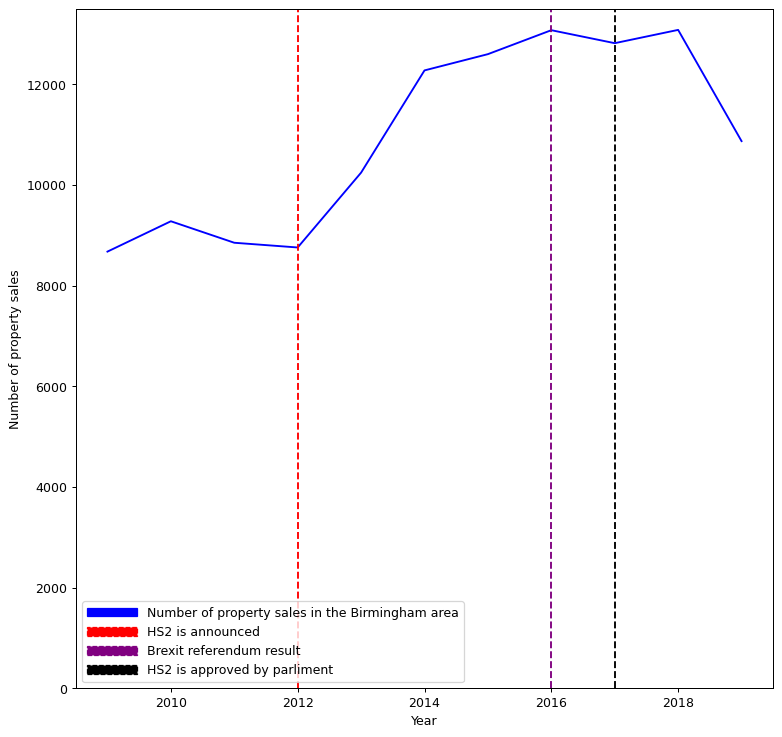

In [36]:
# Importing the required libraries
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

# This line initializes a new figure for the plot
figure(num=None, figsize=(10, 10), dpi=90, facecolor='w', edgecolor='k')

# Defines a blue patch for the legend representing the general trend of "Number of property sales in the Birmingham area.
blue_patch = mpatches.Patch(color='blue', label='Number of property sales in the Birmingham area')
black_patch = mpatches.Patch(color='black', label='HS2 is approved by parliment', linestyle='--')
red_patch = mpatches.Patch(color='red', label='HS2 is announced', linestyle='--')
purple_patch = mpatches.Patch(color='purple', label='Brexit referendum result', linestyle='--')

# This line creates a legend (leg) using the defined patches,The handlelength parameter adjusts the length.
leg = plt.legend(handles=[blue_patch, red_patch, purple_patch, black_patch],handlelength=4)

# These lines extract the index and values from the DataFrame
X = df_sale_count.index
Y = df_sale_count.values

plt.plot(X, Y, color='blue')

# These lines add vertical dashed lines at specific years (2012, 2017, and 2016) to highlight key events
plt.axvline(x=2012, color='red', linestyle='--')
plt.axvline(x=2017, color='black', linestyle='--')
plt.axvline(x=2016, color='purple', linestyle='--')

#Sets the y-axis limits to ensure a proper display of data
plt.ylim(0, 13500)

# Labels the y-axis as "Number of property sales" and the x-axis as "Year.
plt.ylabel('Number of property sales')
plt.xlabel('Year')

plt.show()

It seems that there was a significant surge in property sales after the HS2 (High-Speed 2) announcement, and this increased level of sales continued for several years. However, it is challenging to conclusively attribute this rise directly to the HS2 announcement without comparing it to the total property sales in the entire UK.

The lower property sales observed between 2009 and 2012 might be a result of the lingering impact of the financial crisis. However, it's challenging to validate this hypothesis without having access to data from the period before the financial crisis. The absence of pre-crisis data makes it difficult to establish a clear comparison and draw definitive conclusions about the relationship between the financial crisis and the observed low sales levels during that period.


### 2) What impact has the HS2 project had on property values in various neighborhoods surrounding Birmingham?

First lets look at how much property prices have changed on a postcode level after HS2 was announced.

In [37]:
#First filter data so that only Birmingham properties are included in analysis
df_bham_only = df1[df1['City'] == 'BIRMINGHAM']
df_non_bham_only = df1[df1['City'] != 'BIRMINGHAM']

In [38]:
# This line first selects three columns from the DataFrame
# Then, it groups the data by the columns 'Sale_after_hs2_proposal' and 'PCUnit'
# Finally, it calculates the mean of the 'SalePrice' for each group, resulting in a DataFrame (df_postcode_price) 
# with the average sale prices for different postal units ('PCUnit') before and after the HS2 proposal.
df_postcode_price = df_bham_only[['SalePrice','PCUnit','Sale_after_hs2_proposal']].groupby(['Sale_after_hs2_proposal','PCUnit']).mean()

#These lines extract the average sale prices before and after the HS2 proposal from the grouped DataFrame.
df_postcode_price_before = df_postcode_price['SalePrice'][0]
df_postcode_price_after = df_postcode_price['SalePrice'][1]

# creates a new DataFrame by merging the two DataFrames using an inner join.
df_postcode_price_joined = pd.DataFrame(df_postcode_price_before).merge(df_postcode_price_after,how='inner',
                                                          left_index=True,right_index=True,validate='1:1')

df_postcode_price_joined['PriceIncrease'] = df_postcode_price_joined['SalePrice_y'] - df_postcode_price_joined['SalePrice_x']
df_postcode_price_joined['PriceIncrease'].mean()

11855.382157626764

There has been an observed average increase of `£11,855` in property prices between sales that occurred before and after the HS2 announcement. If more time were available, an interesting avenue to explore would be creating a heatmap overlaid on a satellite image of Birmingham. This heatmap would visually represent the variations in property price changes across different areas based on postcodes, providing a spatial perspective on the impact of the HS2 announcement on property values in the city.

Next, lets plot a graph that looks at average property prices across broader areas in Birmingham on a yearly basis.

 """Takes a pandas series and calculates the
    percentage change between each value in the series

    Keyword arguments:
    df - A pandas series with numerical data
    
    Returns:
    percent_changes - An array that contains the percent change for each value
    """

In [39]:
#Function that can calculate the percentage change in sequential data
def get_percent_changes(df):
    
    percent_changes = []
    for i in range(len(df)):
        if i in (0,11):
            percent_changes.append('N/A')
        else:
            percent_change = (( (df.values[i]-df.values[i-1]) / df.values[i-1]) * 100)
            percent_changes.append(float(np.round(percent_change,2)))
    return percent_changes

- Average house price in the Uk by year 2009 - 2019 to mimic our data

<br>[1]:https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/housepriceindex/june2019

In [40]:
avg_uk_house_prices = [
                        161147.916666667, 
                        170364.583333333,
                        167888.416666667,
                        168555.666666667,
                        161147.916666667,
                        186769.75,
                        197889.666666667,
                        211685.333333333,
                        221239.75,
                        227833.083333333,
                        228443.166666667]

In [41]:
#First filter data so that only Birmhingham properties are included in analysis.
df_bham_only = df1[df1['City'] == 'BIRMINGHAM']
df_non_bham_only = df1[df1['City'] != 'BIRMINGHAM']


In [42]:
# It first selects three columns from the original DataFrame.
# Then, it groups the data based on two columns.
# Finally, it calculates the mean sale price for each group, giving the average sale price for properties within 1 kilometer.
df_price_trend_close = df_bham_only[['SalePrice','Less_than_1k_away','SaleYear']].groupby(['Less_than_1k_away','SaleYear']).mean()

#It groups the data based only on the 'SaleYear' column,The mean sale price for each year is calculated.
df_price_trend_all = df_bham_only[['SalePrice','SaleYear']].groupby(['SaleYear']).mean()
df_price_trend_non_bham = df_non_bham_only[['SalePrice','SaleYear']].groupby(['SaleYear']).mean()

In [43]:
# It calculates the percentage change for the 'SalePrice' column.

df_price_trend_close['Percent_change'] = get_percent_changes(df_price_trend_close['SalePrice'])
df_price_trend_all['Percent_change'] = get_percent_changes(df_price_trend_all['SalePrice'])
df_price_trend_non_bham['Percent_change'] = get_percent_changes(df_price_trend_non_bham['SalePrice'])
pct_chg_UK_avg = get_percent_changes(pd.DataFrame(avg_uk_house_prices))

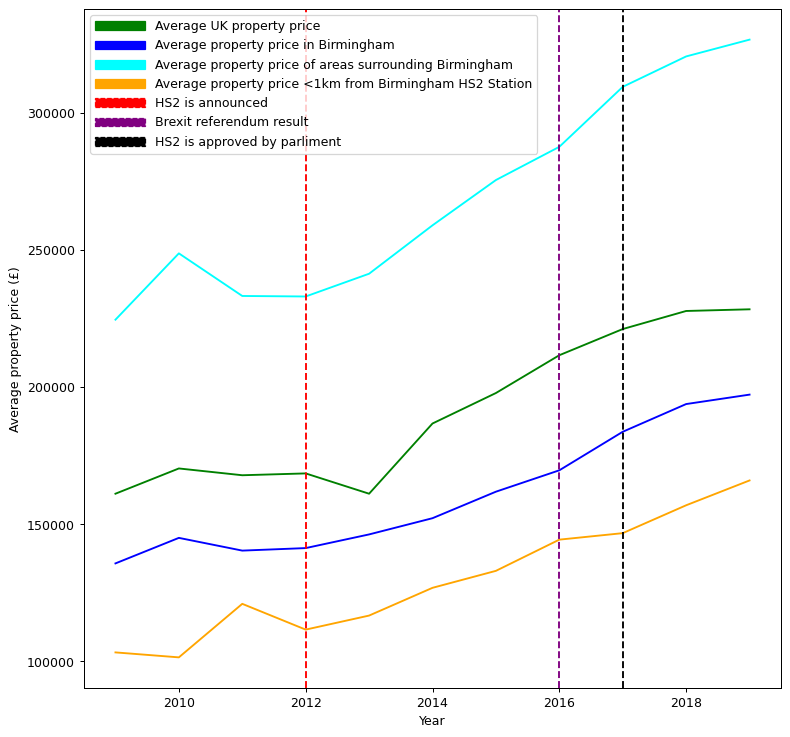

In [44]:
# Initializes a new figure for the plot with specified parameters like size, dots per inch, and background color
figure(num=None, figsize=(10, 10), dpi=90, facecolor='w', edgecolor='k')

# These lines create patches with different colors and labels for the legend
blue_patch = mpatches.Patch(color='blue', label='Average property price in Birmingham')
orange_patch = mpatches.Patch(color='orange', label='Average property price <1km from Birmingham HS2 Station')
green_patch = mpatches.Patch(color='green', label='Average UK property price')
cyan_patch = mpatches.Patch(color='cyan', label='Average property price of areas surrounding Birmingham')
black_patch = mpatches.Patch(color='black', label='HS2 is approved by parliment', linestyle='--')
red_patch = mpatches.Patch(color='red', label='HS2 is announced', linestyle='--')
purple_patch = mpatches.Patch(color='purple', label='Brexit referendum result', linestyle='--')

# Creates a legend using the defined patches with a specified handle length.
leg = plt.legend(handles=[green_patch, blue_patch, cyan_patch, 
                          orange_patch, red_patch, purple_patch, black_patch],handlelength=4)

# Extracts the index (presumably years) from the 'SalePrice' column of the DataFrame df_price_trend_all.
X = df_price_trend_all['SalePrice'].index

# Extracts average property prices for all properties in Birmingham, 
# non-Birmingham properties, and properties within 1 km of Birmingham HS2 Station, respectively.
Y_all = df_price_trend_all['SalePrice'].values
Y_non_bham = df_price_trend_non_bham['SalePrice'].values
Y_close = df_price_trend_close['SalePrice'][1].values

# Plotting Data.
plt.plot(X, Y_all, color='blue')
plt.plot(X, Y_non_bham, color='cyan')
plt.plot(X, Y_close, color='orange')
plt.plot(X, avg_uk_house_prices, color='green')

# To add vertical dashed lines at specific years (2012, 2017, and 2016) to denote events related to HS2 and Brexit.
plt.axvline(x=2012, color='red', linestyle='--')
plt.axvline(x=2017, color='black', linestyle='--')
plt.axvline(x=2016, color='purple', linestyle='--')
       
plt.ylabel('Average property price (£)')
plt.xlabel('Year')

plt.show()

 There is a consistent upward trend in property prices across all areas displayed. However, it is noteworthy to delve deeper into the years post-2017. During this period, the rate of price increases in both the UK and Birmingham starts to decelerate. Despite this general trend, properties situated in close proximity to the HS2 station continue to experience substantial and rapid price growth. Below are the specific numerical percentage increases for these areas, providing a more detailed insight into the varying trajectories of property values.

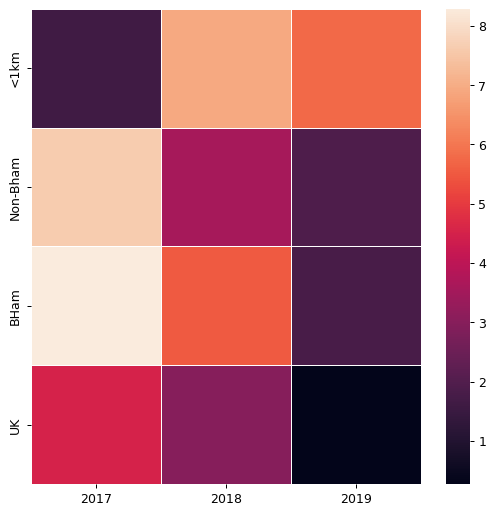

In [45]:
# Initializes a new figure for the heatmap with specified parameters like size, dots per inch, and background color.
figure(num=None, figsize=(7,7), dpi=90, facecolor='w', edgecolor='k')

# This line creates a NumPy array (price_increase_data) containing percentage change data.
price_increase_data = np.array([df_price_trend_close['Percent_change'][1][[2017,2018,2019]].values, 
                                df_price_trend_non_bham['Percent_change'][[2017,2018,2019]].values,
                                df_price_trend_all['Percent_change'][[2017,2018,2019]].values,
                                [pct_chg_UK_avg[8], pct_chg_UK_avg[9], pct_chg_UK_avg[10]]])

# Converts the data in the price_increase_data array to float type, ensuring compatibility for plotting.
price_increase_data = price_increase_data.astype(float)

# Uses the Seaborn (sns) library to create a heatmap (ax).
# The price_increase_data array is used as the data source, and linewidth=0.5 sets the width of the lines between cells.
ax = sns.heatmap(price_increase_data, linewidth=0.5)
ax.set_xticklabels(['2017','2018','2019'])
ax.set_yticklabels(['<1km','Non-Bham','BHam','UK'])
plt.show()

The overall trend suggests that property prices in Birmingham are closely mirroring the broader pattern observed across the entire UK. As of now, it appears that the HS2 announcement has not exerted a substantial influence on property prices in Birmingham. However, it is acknowledged that this dynamic may undergo a shift once the HS2 line becomes operational. The full impact of the HS2 project on property prices might only become apparent post-implementation

Properties located within walking distance of the upcoming HS2 station have experienced price increases that exceed the average seen across the entire UK in recent years. It is anticipated that this trend will persist and potentially intensify as the HS2 project nears completion, provided that the project continues to progress as expected. The expectation is that the proximity to the HS2 station will contribute to continued positive growth in property values for these specific areas

### 3) Has the construction of HS2 influenced the quantity of residential properties developed in the vicinity?

In [46]:
# Reading the 'age' Dataset and showing first few lines of dataset.
age = pd.read_csv("VOA Property Age Data.csv")
age.head(2)

,Code,GEOG,Name,Pre_1900,1900_1918,1919_1929,1930_1939,1945_1954,1955_1964,1965_1972,1973_1982,1983_1992,1993_1999,2000_2009,2010_Present,UNKNOWN,Year
0,E01008897,LSOA,Birmingham 067B,0,20,430,0,0,10,0,130,10,0,0,10,0,2019
1,E01008899,LSOA,Birmingham 037A,60,70,0,60,0,30,160,120,50,0,0,10,10,2019


In [47]:
#Use the data gathered in 2019
df_age_newest = age[age['Year']==2019] 
df_sales = pd.DataFrame(df_age_newest.drop(columns=['Code','GEOG','Name','UNKNOWN','Year']).sum())

In [48]:
#Exclude Pre-1900 sales as we can't get sales/yr
df_sales = df_sales[df_sales.index != 'Pre_1900'] 
df_sales['Lower_range'] = [1900,1919,1930,1945,1955,1965,1973,1983,1993,2000,2010]
df_sales['Upper_range'] = [1918,1929,1939,1954,1964,1972,1982,1992,1999,2009,2020]
df_sales['Avg_sales_per_year'] = round(df_sales[0]/(df_sales['Upper_range'] - df_sales['Lower_range']),0)
df_sales

,0,Lower_range,Upper_range,Avg_sales_per_year
1900_1918,37100,1900,1918,2061.0
1919_1929,49360,1919,1929,4936.0
1930_1939,76320,1930,1939,8480.0
1945_1954,28990,1945,1954,3221.0
1955_1964,34230,1955,1964,3803.0
1965_1972,43960,1965,1972,6280.0
1973_1982,34050,1973,1982,3783.0
1983_1992,17510,1983,1992,1946.0
1993_1999,14720,1993,1999,2453.0
2000_2009,27510,2000,2009,3057.0


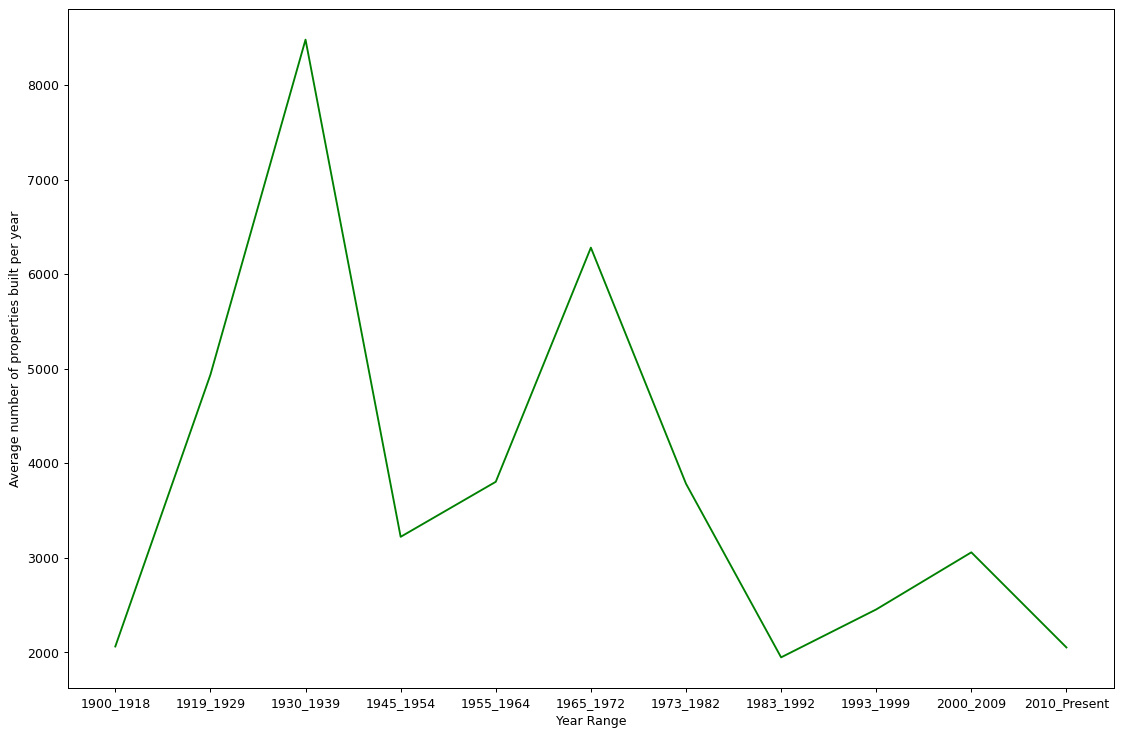

In [49]:
# Initializes a new figure for the plot with specified parameters like size, dots per inch, and background color.
figure(num=None, figsize=(15, 10), dpi=90, facecolor='w', edgecolor='k')

# Extracts the index values (presumably representing years) from the DataFrame df_sales.
# Extracts the values from the 'Avg_sales_per_year' column, representing the average number of properties built per year.
X = df_sales.index.values
Y = df_sales['Avg_sales_per_year']

# Plots the data using a green line. The x-axis represents the years
# The y-axis represents the average number of properties built per year.
plt.plot(X, Y, color='g')
plt.ylabel('Average number of properties built per year')
plt.xlabel('Year Range')

plt.show()

The graph indicates fluctuations in property construction over time. Notable points include a peak around 1930-1939 with 8480 properties, a post-war dip in the mid-1940s, and a gradual increase from 1955-1964. The data suggests variations in housing development trends, providing insights into historical patterns and potential influencing factors